## Imports

In [13]:
import requests
import json
import numpy as np
import math
import time
import pandas as pd
import nltk
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

from PIL import Image, ImageOps
from wordcloud import WordCloud, STOPWORDS

In [14]:
%run wordart.py

## Fetch data

In [15]:
# By search term

reader = NYTReader()
reader.get_search_term(search='headline:("San Francisco", "Oakland", "Silicon Valley")', 
                     begin_date='20010101',
                     article_limit=500)

len(reader.docs), min([x['pub_date'] for x in reader.docs]), max([x['pub_date'] for x in reader.docs])

(250, '2001-01-14T00:00:00Z', '2017-10-12T20:27:23+0000')

In [16]:
# By date

# reader=NYTReader()
# reader.get_dates(begin_date='19850814', end_date='19850814')
# 
# len(reader.docs), min([x['pub_date'] for x in reader.docs]), max([x['pub_date'] for x in reader.docs])

## Testing different types of sources

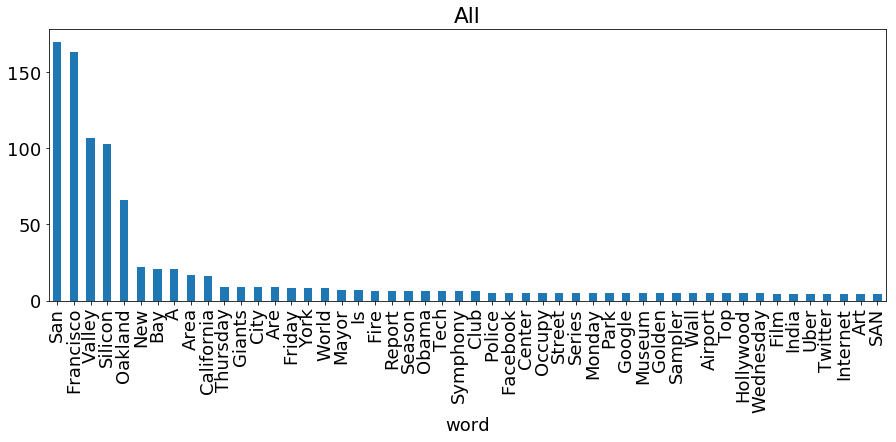

In [18]:
pos = reader.pos['include']
exclude = False
print_tuple = False

text = []
sources = [
            reader.headlines, 
            #reader.keywords, 
            reader.snippets,
          ]

for source in sources:
    text.extend(source)

reader.plot_top_words(df=reader.df_from_text(text), n=50, title="All", pos_list=pos, exclude=exclude, print_tuple=print_tuple)

## Build word list

In [19]:
text_words = reader.get_words(reader.df_from_text(text), pos_list=None, exclude=exclude)
text_string = ' '.join(text_words)
len(text_words), len(set(text_words))

(7831, 2999)

## Read and modify image

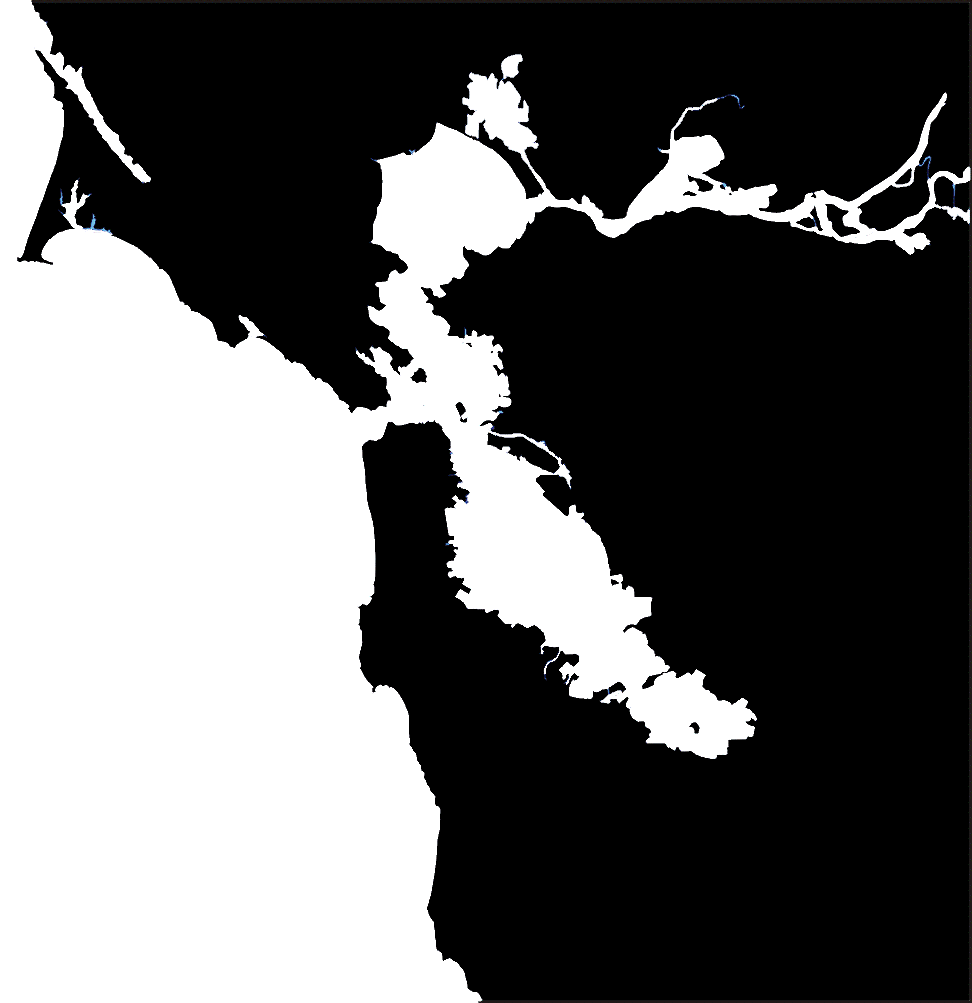

In [20]:
image = Image.open('source images/Location_Map_San_Francisco_Bay_Area_edited.gif')
#image = image.resize([int(image.size[0]/2), int(image.size[1]/2)])
image = image.convert(mode='RGB')
#image = ImageOps.invert(image)
image

## Make wordcloud

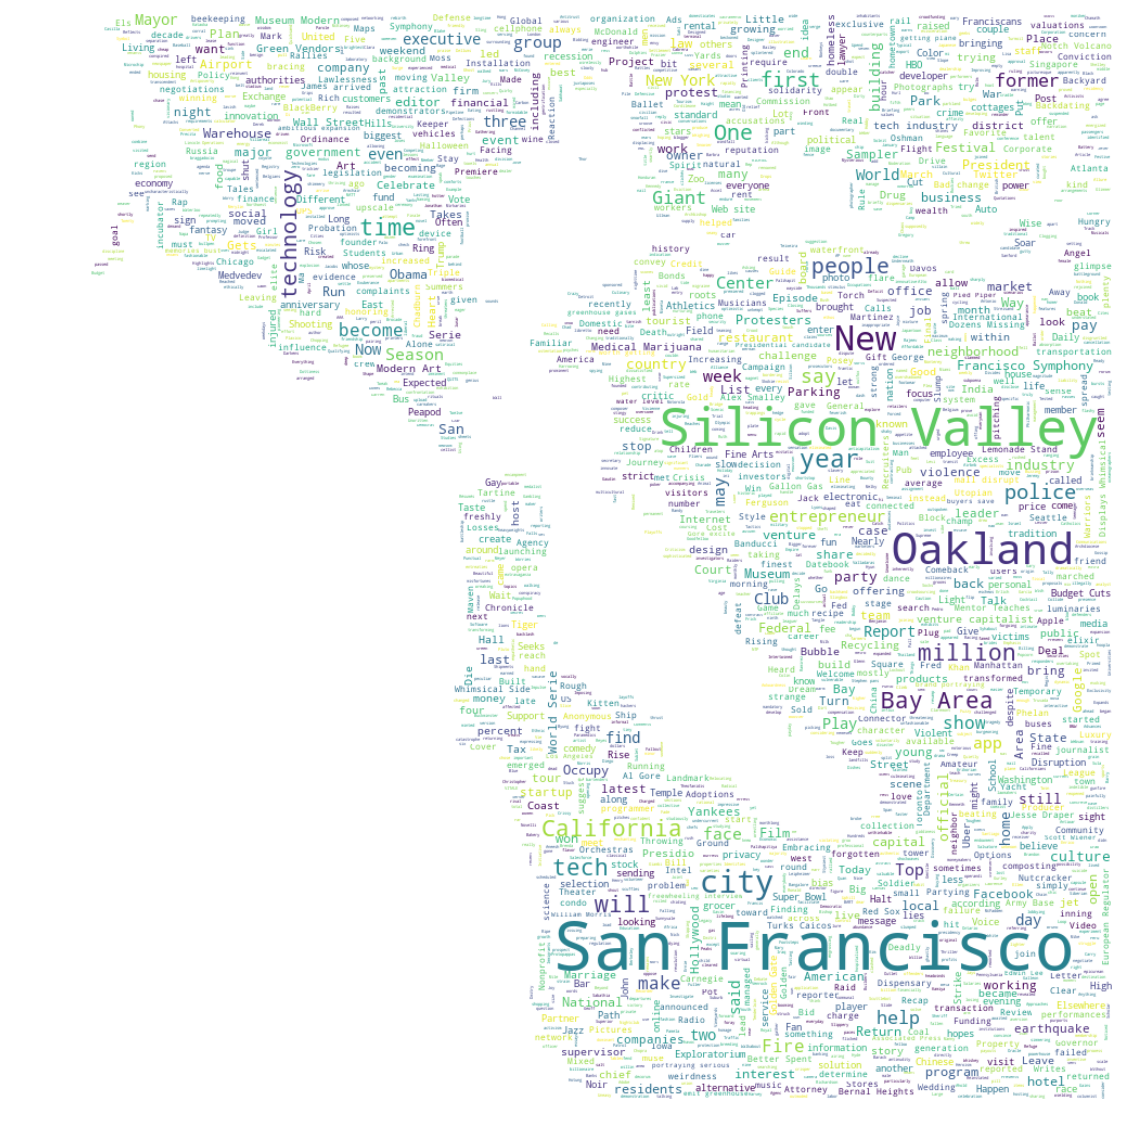

In [29]:
mask = np.array(image)
stopwords = set(STOPWORDS)
stopwords_to_add = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for word in stopwords_to_add: 
    stopwords.add(word)
    
wc = WordCloud(background_color="white", max_words=4000, mask=mask,
               stopwords=stopwords, )#contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text_string)

# store to file
wc.to_file("final images/sf_bay.png")

# show
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()